In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [2]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(1000)
df.to_csv("BA_reviews.csv")
dataset = pd.read_csv("BA_reviews.csv")
print(dataset.head())


   Unnamed: 0                                            reviews
0           0  ✅ Trip Verified | Absolutely horrible airline....
1           1  ✅ Trip Verified |  Having experienced delays a...
2           2  ✅ Trip Verified | Travelled to Heathrow to Kal...
3           3  Not Verified |  This flight failed at every le...
4           4  Not Verified |  Beware of British Airways and ...


In [3]:
!pip install wordcloud
!pip install --upgrade scikit-learn
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer


  Using cached scikit_learn-1.2.2-cp39-cp39-macosx_10_9_x86_64.whl (9.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.0
    Uninstalling scikit-learn-1.2.0:
      Successfully uninstalled scikit-learn-1.2.0


In [4]:
dataset = pd.read_csv("BA_reviews.csv")
dataset['reviews']=dataset['reviews'].apply(lambda x:" ".join(x.lower() for x in x.split()) )
# removing punctuations,special characters

dataset['reviews']= dataset['reviews'].str.replace ('[^\w\s]+|\d+', '', regex=True)
nltk.download('stopwords')

stop_words=set(stopwords.words('english'))
def remove_stop(x):
    return " ".join([word for word in str(x).split() if word not in stop_words])
ps=nltk.PorterStemmer()

def stemming(reviews):

    return " ".join([ps.stem(word) for word in reviews.split()])
def tokenize(reviews):
    tokens=re.split('\W+',reviews)
    return tokens

dataset['reviews'] = dataset['reviews'].apply(lambda x: remove_stop(x))
dataset['reviews']=dataset['reviews'].apply(lambda x: stemming(x))
dataset['reviews']=dataset['reviews'].apply(lambda x: tokenize(x))
dataset.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/asifsiraz/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Unnamed: 0,reviews
0,0,"[trip, verifi, absolut, horribl, airlin, commu..."
1,1,"[trip, verifi, experienc, delay, cancel, depar..."
2,2,"[trip, verifi, travel, heathrow, kalamata, ret..."
3,3,"[verifi, flight, fail, everi, level, delay, ar..."
4,4,"[verifi, bewar, british, airway, market, make,..."


In [5]:
def lemmatizing(reviews):
    reviews=[word for word in reviews]
    return reviews
dataset['reviews']=dataset['reviews'].apply(lambda x: lemmatizing(x))

# View the updated dataset
dataset.head()

,Unnamed: 0,reviews
0,0,"[trip, verifi, absolut, horribl, airlin, commu..."
1,1,"[trip, verifi, experienc, delay, cancel, depar..."
2,2,"[trip, verifi, travel, heathrow, kalamata, ret..."
3,3,"[verifi, flight, fail, everi, level, delay, ar..."
4,4,"[verifi, bewar, british, airway, market, make,..."


In [6]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

sentiments = SentimentIntensityAnalyzer()

res = {}
for i, row in tqdm(dataset.iterrows(), total=len(dataset['reviews'])):
    text = row['reviews']
    encoded_text = ' '.join(text)  # Convert the list of words to a string
    scores = sentiments.polarity_scores(encoded_text)  # Apply polarity scores to the encoded text
    res[i] = scores
vaders=pd.DataFrame(res).T
vaders.head(1000)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/asifsiraz/nltk_data...
100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1012.50it/s]


,neg,neu,pos,compound
0,0.203,0.797,0.000,-0.6249
1,0.251,0.658,0.091,-0.4767
2,0.094,0.708,0.197,0.7506
3,0.088,0.805,0.107,0.2263
4,0.017,0.953,0.029,0.1386
...,...,...,...,...
995,0.120,0.631,0.249,0.5994
996,0.000,0.738,0.262,0.7506
997,0.069,0.847,0.084,0.3318
998,0.018,0.959,0.023,0.1779


In [7]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
import pandas as pd

sentiments = SentimentIntensityAnalyzer()

# Create a list to store the sentiment labels
sentiment_labels = []

# Iterate through each review in the dataset
for i, row in tqdm(dataset.iterrows(), total=len(dataset['reviews'])):
    text = row['reviews']
    encoded_text = ' '.join(text)
    scores = sentiments.polarity_scores(encoded_text)
    res[i] = scores  

    # Determine the sentiment label based on the score
    if scores['pos'] > scores['neg']:
        sentiment = 'positive'
    elif scores['pos'] < scores['neg']:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    
    sentiment_labels.append(sentiment)

# Add the sentiment labels to the dataset as a new column
dataset['sentiment'] = sentiment_labels

# Print the dataset with the sentiment column
dataset.head(1000)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/asifsiraz/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1057.58it/s]


,Unnamed: 0,reviews,sentiment
0,0,"[trip, verifi, absolut, horribl, airlin, commu...",negative
1,1,"[trip, verifi, experienc, delay, cancel, depar...",negative
2,2,"[trip, verifi, travel, heathrow, kalamata, ret...",positive
3,3,"[verifi, flight, fail, everi, level, delay, ar...",positive
4,4,"[verifi, bewar, british, airway, market, make,...",positive
...,...,...,...
995,995,"[trip, verifi, london, pari, wish, would, upda...",positive
996,996,"[trip, verifi, deliv, outstand, custom, servic...",positive
997,997,"[trip, verifi, night, flight, new, york, jfk, ...",positive
998,998,"[trip, verifi, amman, london, appal, servic, f...",positive


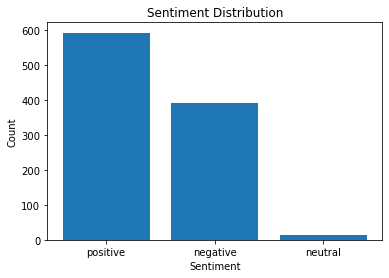

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt

# Count the number of occurrences for each sentiment label
sentiment_counts = dataset['sentiment'].value_counts()

# Plot the sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()
plt.savefig('Sentiment Distribution.png')

In [9]:

from sklearn.feature_extraction.text import TfidfVectorizer


In [10]:
Tfidf_vect=TfidfVectorizer(analyzer=lemmatizing)
x_Tfidf =Tfidf_vect.fit_transform(dataset['reviews'])
print(x_Tfidf.shape)
print(Tfidf_vect.get_feature_names_out())
Tfidf_dataset=pd.DataFrame(x_Tfidf.toarray())
Tfidf_dataset

(1000, 5211)
['aa' 'ab' 'abandon' ... 'zurich' 'zusammenschluss' 'über']


,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, Y_train, Y_test = train_test_split(Tfidf_dataset, dataset['sentiment'], test_size=0.25)

def train_rf(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)
    label = ['positive', 'negative']  # Specify the positive label here
    precision, recall, fscore, support = score(Y_test, Y_pred, labels=label, average=None)
    accuracy = np.mean(Y_pred == Y_test)
    print(f"Est: {n_est}/Depth: {depth} ---- Precision: {precision[0]:.3f} / Recall: {recall[0]:.3f} / Accuracy: {accuracy:.3f}")

estimators = [10, 50, 100]
depths = [10, 20, 30, None]

for n_est in estimators:
    for depth in depths:
        train_rf(n_est, depth) 


Est: 10/Depth: 10 ---- Precision: 0.741 / Recall: 0.890 / Accuracy: 0.740
Est: 10/Depth: 20 ---- Precision: 0.739 / Recall: 0.864 / Accuracy: 0.724
Est: 10/Depth: 30 ---- Precision: 0.805 / Recall: 0.883 / Accuracy: 0.792
Est: 10/Depth: None ---- Precision: 0.779 / Recall: 0.779 / Accuracy: 0.728
Est: 50/Depth: 10 ---- Precision: 0.746 / Recall: 0.916 / Accuracy: 0.756
Est: 50/Depth: 20 ---- Precision: 0.784 / Recall: 0.942 / Accuracy: 0.800
Est: 50/Depth: 30 ---- Precision: 0.796 / Recall: 0.935 / Accuracy: 0.812
Est: 50/Depth: None ---- Precision: 0.795 / Recall: 0.909 / Accuracy: 0.800
Est: 100/Depth: 10 ---- Precision: 0.720 / Recall: 0.935 / Accuracy: 0.736
Est: 100/Depth: 20 ---- Precision: 0.780 / Recall: 0.942 / Accuracy: 0.796
Est: 100/Depth: 30 ---- Precision: 0.796 / Recall: 0.935 / Accuracy: 0.808
Est: 100/Depth: None ---- Precision: 0.811 / Recall: 0.922 / Accuracy: 0.820


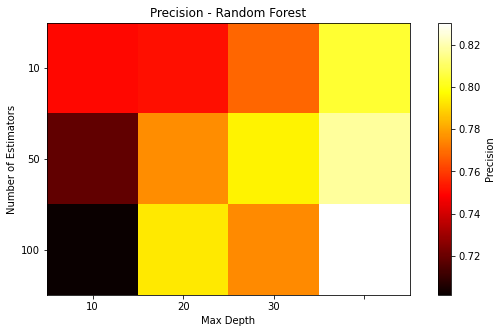

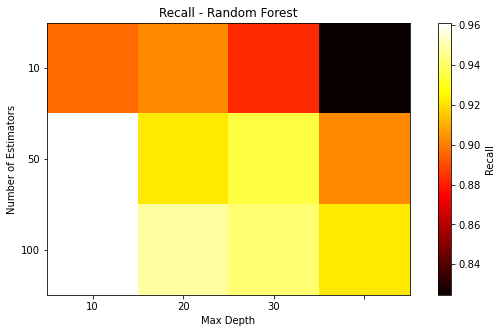

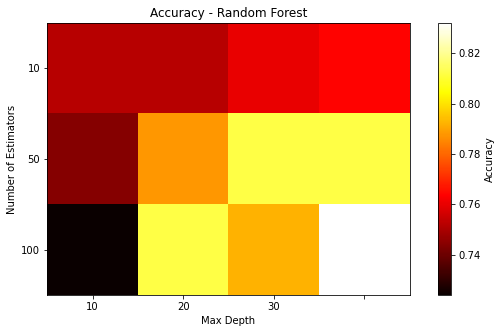

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt

def train_rf(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)
    label = 'positive'  # Specify the positive label here
    precision, recall, fscore, support = score(Y_test, Y_pred, labels=[label], average=None)
    accuracy = np.mean(Y_pred == Y_test)
    return precision[0], recall[0], accuracy

estimators = [10, 50, 100]
depths = [10, 20, 30, None]

precisions = []
recalls = []
accuracies = []

for n_est in estimators:
    for depth in depths:
        precision, recall, accuracy = train_rf(n_est, depth)
        precisions.append(precision)
        recalls.append(recall)
        accuracies.append(accuracy)

# Reshape the scores into a grid for plotting
precisions = np.array(precisions).reshape(len(estimators), len(depths))
recalls = np.array(recalls).reshape(len(estimators), len(depths))
accuracies = np.array(accuracies).reshape(len(estimators), len(depths))

# Plotting precision
plt.figure(figsize=(10, 5))
plt.imshow(precisions, cmap='hot', interpolation='nearest')
plt.colorbar(label='Precision')
plt.xticks(range(len(depths)), depths)
plt.yticks(range(len(estimators)), estimators)
plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.title('Precision - Random Forest')
plt.show()

# Plotting recall
plt.figure(figsize=(10, 5))
plt.imshow(recalls, cmap='hot', interpolation='nearest')
plt.colorbar(label='Recall')
plt.xticks(range(len(depths)), depths)
plt.yticks(range(len(estimators)), estimators)
plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.title('Recall - Random Forest')
plt.show()

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.imshow(accuracies, cmap='hot', interpolation='nearest')
plt.colorbar(label='Accuracy')
plt.xticks(range(len(depths)), depths)
plt.yticks(range(len(estimators)), estimators)
plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.title('Accuracy - Random Forest')
plt.show()
plt.savefig('RandomForest.png')
